<a href="https://colab.research.google.com/github/icesuaraara/Python_ML/blob/main/Helmet_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Library



In [ ]:
pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 83 kB 2.3 MB/s 
     |████████████████████████████████| 185 kB 36.3 MB/s 
     |████████████████████████████████| 578.0 MB 16 kB/s 
     |████████████████████████████████| 16.0 MB 50.5 MB/s 
     |████████████████████████████████| 40 kB 7.6 MB/s 
     |████████████████████████████████| 237 kB 72.8 MB/s 
     |████████████████████████████████| 145 kB 69.2 MB/s 
     |████████████████████████████████| 51 kB 6.4 MB/s 
     |████████████████████████████████| 1.7 MB 55.8 MB/s 
     |████████████████████████████████| 438 kB 73.3 MB/s 
     |████████████████████████████████| 5.9 MB 59.5 MB/s 
     |████████████████████████████████| 85 kB 5.6 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  At

In [ ]:
pip install ann_visualizer

In [ ]:
pip install graphviz

# Import Libary

In [ ]:
import numpy as np

import io
import os
import pandas as pd
import matplotlib as pl
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt      # MATLAB like plotting routines
import random                        # for generating random numbers

from keras.models import Sequential  # Model type to be used

from keras.layers.core import Dense, Dropout, Activation # Types of layers to be used in our model
from keras.utils import np_utils

from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten
#from keras.layers.normalization import BatchNormalization
from keras.layers.normalization import layer_normalization

import keras
import tensorflow as tf

import tensorflowjs as tfjs
import pandas as pd

from sklearn.metrics import classification_report,confusion_matrix
from ann_visualizer.visualize import ann_viz
import graphviz

In [ ]:
from google.colab import drive #case mounted gdrive
drive.mount('/content/gdrive', force_remount=False)


Mounted at /content/gdrive


In [ ]:
import os  #case connect via OS
os.chdir("/content/gdrive/")
os.getcwd()

'/content/gdrive'

In [ ]:
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from PIL import Image

X =  []
y = []


In [ ]:
class_name = ["Helment", "Not Helment"]

In [ ]:
path_Helmet = "/content/gdrive/MyDrive/Colab Notebooks/Helmet_Detection_Project/Helmet"
files_Helmet = os.listdir(path_Helmet)

for filename in files_Helmet:
    print(path_Helmet+"/"+filename)

    # โหลดรูปภาพ
    img = load_img(path_Helmet+"/"+filename)

    # เปลื่ยนขนาดไฟส์รูปภาพ ให้เป็น width 120px heifht 120px
    img = img.resize((120,120), Image.ANTIALIAS)
    print(img.size)
    img.show()

    # เปลื่ยนรูปภาพให้อยู่ในรูปของ Array โดยข้างในจะเป็นข้อมูลของค่าสี RGB
    img_array = img_to_array(img)

    X.append(img_array)
    y.append([1, 0])

/content/gdrive/MyDrive/Colab Notebooks/Helmet_Detection_Project/Helmet/288_2_2.png
(120, 120)
/content/gdrive/MyDrive/Colab Notebooks/Helmet_Detection_Project/Helmet/311_0_3.png
(120, 120)
/content/gdrive/MyDrive/Colab Notebooks/Helmet_Detection_Project/Helmet/229_2_2.png
(120, 120)
/content/gdrive/MyDrive/Colab Notebooks/Helmet_Detection_Project/Helmet/308_0_2.png
(120, 120)
/content/gdrive/MyDrive/Colab Notebooks/Helmet_Detection_Project/Helmet/229_0_4.png
(120, 120)
/content/gdrive/MyDrive/Colab Notebooks/Helmet_Detection_Project/Helmet/208_0_1.png
(120, 120)
/content/gdrive/MyDrive/Colab Notebooks/Helmet_Detection_Project/Helmet/38_0_4.png
(120, 120)
/content/gdrive/MyDrive/Colab Notebooks/Helmet_Detection_Project/Helmet/302_0_3.png
(120, 120)
/content/gdrive/MyDrive/Colab Notebooks/Helmet_Detection_Project/Helmet/229_3_4.png
(120, 120)
/content/gdrive/MyDrive/Colab Notebooks/Helmet_Detection_Project/Helmet/33_0_2.png
(120, 120)
/content/gdrive/MyDrive/Colab Notebooks/Helmet_Detec

In [ ]:
path_notHelmet = "/content/gdrive/MyDrive/Colab Notebooks/Helmet_Detection_Project/Not_Helmet"
files_notHelmet = os.listdir(path_notHelmet)

for filename in files_notHelmet:
    print(path_notHelmet+"/"+filename)

    # โหลดรูปภาพ
    img = load_img(path_notHelmet+"/"+filename)

    # เปลื่ยนขนาดไฟส์รูปภาพ ให้เป็น width 120px heifht 120px
    img = img.resize((120,120))
    print(img.size)
    img.show()

    # เปลื่ยนรูปภาพให้อยู่ในรูปของ Array โดยข้างในจะเป็นข้อมูลของค่าสี RGB
    img_array = img_to_array(img)

    X.append(img_array)
    y.append([0, 1])

/content/gdrive/MyDrive/Colab Notebooks/Helmet_Detection_Project/Not_Helmet/3_0.jpg
(120, 120)
/content/gdrive/MyDrive/Colab Notebooks/Helmet_Detection_Project/Not_Helmet/37_0.png
(120, 120)
/content/gdrive/MyDrive/Colab Notebooks/Helmet_Detection_Project/Not_Helmet/19_0.png
(120, 120)
/content/gdrive/MyDrive/Colab Notebooks/Helmet_Detection_Project/Not_Helmet/12_0.jpg
(120, 120)
/content/gdrive/MyDrive/Colab Notebooks/Helmet_Detection_Project/Not_Helmet/5_0.jpg
(120, 120)
/content/gdrive/MyDrive/Colab Notebooks/Helmet_Detection_Project/Not_Helmet/32_2.png
(120, 120)
/content/gdrive/MyDrive/Colab Notebooks/Helmet_Detection_Project/Not_Helmet/13_0.jpg
(120, 120)
/content/gdrive/MyDrive/Colab Notebooks/Helmet_Detection_Project/Not_Helmet/58_0.png
(120, 120)
/content/gdrive/MyDrive/Colab Notebooks/Helmet_Detection_Project/Not_Helmet/1_1.jpg
(120, 120)
/content/gdrive/MyDrive/Colab Notebooks/Helmet_Detection_Project/Not_Helmet/33_1.png
(120, 120)
/content/gdrive/MyDrive/Colab Notebooks/Hel

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
X = X.reshape(len(y),120,120,3)
x_vector = 120*120*3

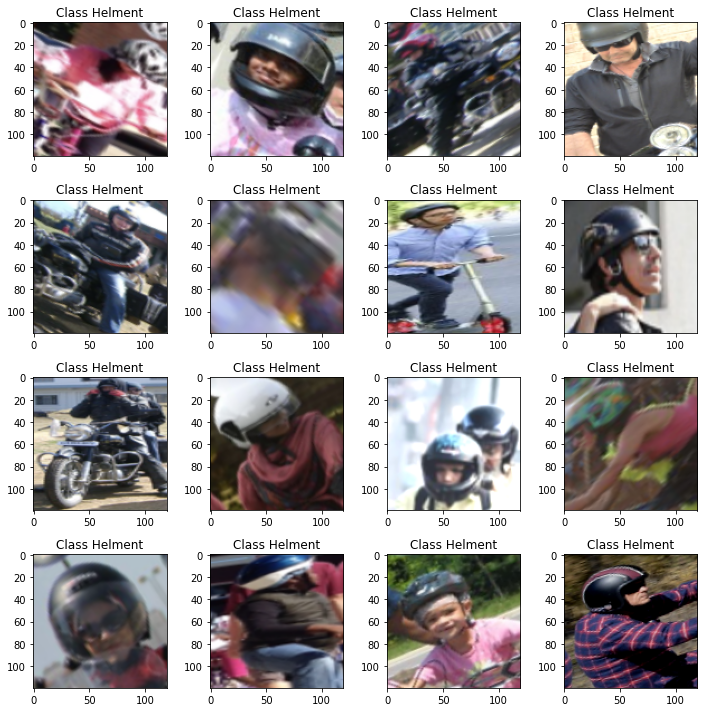

In [ ]:
plt.rcParams['figure.figsize'] = (10,10) # change figure size to plot graph

# นำข้อมูลใน Dataset ออกมาแสดง แค่ 16 ตัวโดยจะแสดงเป็น 4 แถว 4 คอลัม
for i in range(16):
    plt.subplot(4,4,i+1)
    img_array = X[i]
    plt.imshow(np.uint8(img_array))
    cl = np.argmax(y[i])
    plt.title("Class {}".format(class_name[cl]))

plt.tight_layout()

แบ่งข้อมูล train data และ test data

In [ ]:
# แบ่ง Dataset เป็นชุด Train กับ Test โดยจะแบ่งเป็นชุดเทส 20%
X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.20, random_state=1000)
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (2649, 120, 120, 3)
y_train shape (2649, 2)
X_test shape (663, 120, 120, 3)
y_test shape (663, 2)


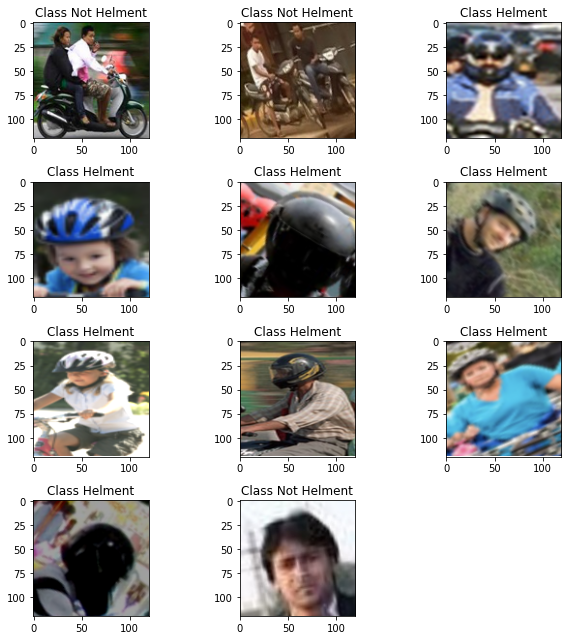

In [ ]:
plt.rcParams['figure.figsize'] = (9,9) # change figure size to plot graph

for i in range(11):
    plt.subplot(4,3,i+1)
    img_array = X_train[i]
    plt.imshow(np.uint8(img_array))
    cl = np.argmax(y_train[i])
    plt.title("Class {}".format(class_name[cl]))

plt.tight_layout()

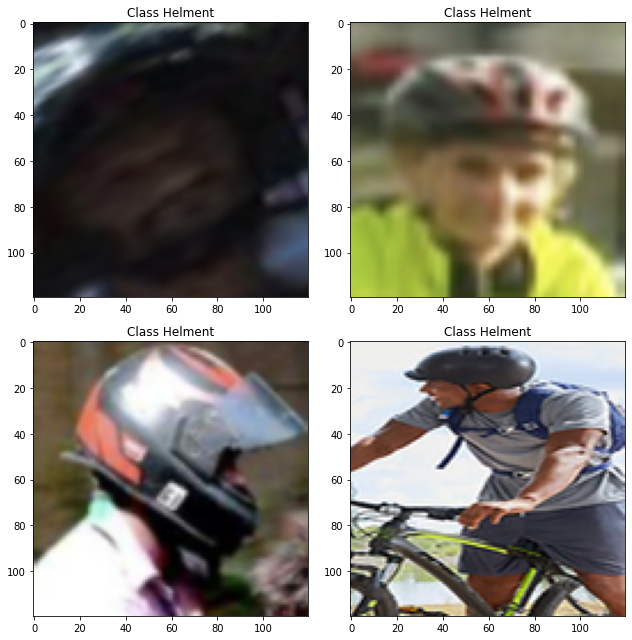

In [ ]:
plt.rcParams['figure.figsize'] = (9,9) # change figure size to plot graph

for i in range(4):
    plt.subplot(2,2,i+1)
    img_array = X_test[i]
    plt.imshow(np.uint8(img_array))
    cl = np.argmax(y_test[i])
    plt.title("Class {}".format(class_name[cl]))

plt.tight_layout()

In [ ]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D

model = Sequential()
model.add(Conv2D(3, kernel_size=(3, 3),
                 activation='relu',
                 padding='same',
                 input_shape=(120,120, 3)))
model.add(MaxPooling2D((3, 3)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(16,  activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8,  activation='relu'))
model.add(Dense(8,  activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4,  activation='relu'))
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 120, 120, 3)       84        
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 40, 40, 3)         0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 40, 40, 3)         0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 4800)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 16)                76816     
_________________________________________________________________
dropout_19 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_31 (Dense)             (None, 8)                

Complie model

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Learning

In [ ]:
history = model.fit(X_train, y_train, batch_size=30, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
89/89 [==============================] - 2s 11ms/step - loss: 1.0133 - accuracy: 0.6485 - val_loss: 0.6601 - val_accuracy: 0.6983
Epoch 2/100
89/89 [==============================] - 1s 8ms/step - loss: 0.6443 - accuracy: 0.6920 - val_loss: 0.6240 - val_accuracy: 0.6983
Epoch 3/100
89/89 [==============================] - 1s 9ms/step - loss: 0.6106 - accuracy: 0.6938 - val_loss: 0.6075 - val_accuracy: 0.6983
Epoch 4/100
89/89 [==============================] - 1s 9ms/step - loss: 0.5914 - accuracy: 0.6946 - val_loss: 0.6035 - val_accuracy: 0.6983
Epoch 5/100
89/89 [==============================] - 1s 9ms/step - loss: 0.5812 - accuracy: 0.6897 - val_loss: 0.5635 - val_accuracy: 0.6983
Epoch 6/100
89/89 [==============================] - 1s 9ms/step - loss: 0.5563 - accuracy: 0.6935 - val_loss: 0.5644 - val_accuracy: 0.6983
Epoch 7/100
89/89 [==============================] - 1s 9ms/step - loss: 0.5412 - accuracy: 0.6927 - val_loss: 0.5307 - val_accuracy: 0.6983
Epoch 8/100


Evaluation

In [ ]:
score = model.evaluate(X_train, y_train, verbose = 0)
print('Train loss : ', score[0])
print('Train accuracy : ', score[1])

Train loss :  0.11141861975193024
Train accuracy :  0.9739524126052856


In [ ]:
score1 = model.evaluate(X_test, y_test, verbose = 0)
print('Test loss : ', score1[0])
print('Test accuracy : ', score1[1])

Test loss :  0.8060487508773804
Test accuracy :  0.8054298758506775


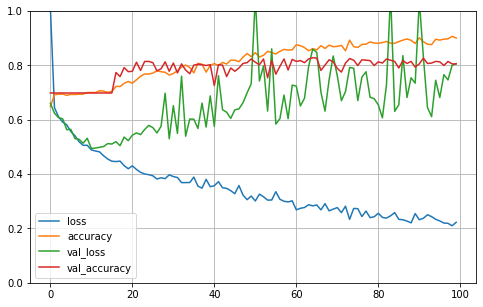

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=-1)
y_pred_class = np.argmax(y_pred,axis=-1)

print(confusion_matrix(y_test_class,y_pred_class))

[[401  62]
 [ 67 133]]


In [ ]:
test_predict = tf.keras.Sequential([model,tf.keras.layers.Softmax()])
result = test_predict.predict(X_test)
for i in range(4):
  print(class_name[int(np.argmax(result[i]))])

21/21 [==============================] - 0s 4ms/step
Not Helment
Helment
Helment
Helment


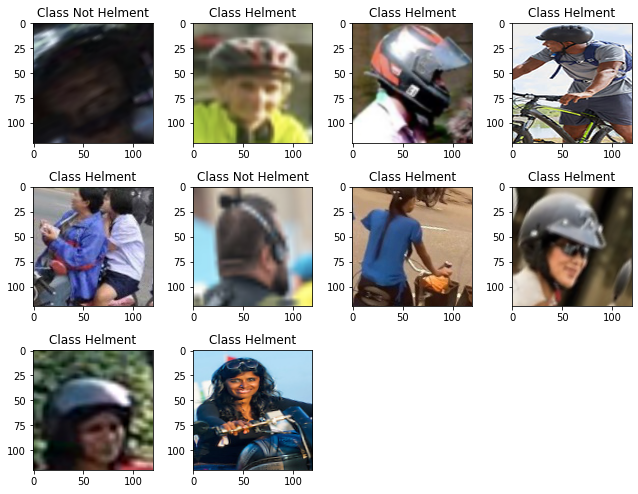

In [ ]:
plt.rcParams['figure.figsize'] = (9,9) # change figure size to plot graph

for i in range(10):
    plt.subplot(4,4,i+1)
    plt.imshow(np.uint8(X_test[i]))
    cl = np.argmax(result[i])
    plt.title("Class {}".format(class_name[cl]))
plt.tight_layout()

In [ ]:
ann_viz(classifier,  filename='Helment_Detection_CNN_model.gv',title=" Neural Network model Helment_Detection from CNN)
graph_file = graphviz.Source.from_file('Helment_Detection_CNN_model.gv')
graph_file

In [ ]:
# Save Model
# model.save("/content/gdrive/MyDrive/Colab Notebooks/Helmet_Detection_Project/model.h5")
tfjs.converters.save_keras_model(model, "/content/gdrive/MyDrive/Colab Notebooks/Helmet_Detection_Project/model")
print("Saved model.")

Saved model.
